# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv(r'/Users/edgartome_1/IronHack/IronLabs/Module2/Lab5/Employee.csv')
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
employees.pivot_table(index=["Department"], values=["Salary"])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your code here
employees[["Department", "Salary"]].groupby(['Department']).agg('mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
employees.pivot_table(index=["Department"], columns=['Title'], values=["Salary"], fill_value=0)

Salary                  
Title          VP analyst associate
Department                         
HR             70    32.5         0
IT             70    32.5        60
Sales           0     0.0        55

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
employees.pivot_table(index=["Title"], columns=['Years'], values=["Salary"], fill_value=0)

Salary                    
Years          1   2   3   4   7   8
Title                               
VP             0   0   0   0   0  70
analyst       35  30   0  35   0   0
associate      0  55  55   0  60   0

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here
employees.pivot_table(index=['Department'], columns=['Title'], values=['Salary'], aggfunc={'Salary': np.mean, "Title" : len}, fill_value=0) 


Salary                   Title                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR             70    32.5         0     1       2         0
IT             70    32.5        60     1       2         1
Sales           0     0.0        55     0       0         2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your code here

employees.pivot_table(index=["Department"], columns=['Title'], values=["Salary"], aggfunc={'Salary': [min, max, np.median, np.std]})

Salary                                                           \
              max                   median                     min           
Title          VP analyst associate     VP analyst associate    VP analyst   
Department                                                                   
HR           70.0    35.0       NaN   70.0    32.5       NaN  70.0    30.0   
IT           70.0    35.0      60.0   70.0    32.5      60.0  70.0    30.0   
Sales         NaN     NaN      55.0    NaN     NaN      55.0   NaN     NaN   

                                          
                           std            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

In [9]:
"""
your commments here
The values for the three departms are very similiar, for VP and associate they are the same for that the ST is zero only diferente in analyst, thats why we have ST.
The are no position of VP in sales, that why is NAN the value
"""

'\nyour commments here\nThe values for the three departms are very similiar, for VP and associate they are the same for that the ST is zero only diferente in analyst, thats why we have ST.\nThe are no position of VP in sales, that why is NAN the value\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your code here
#Can be fild whit zero
employees.pivot_table(index=["Department"], columns=['Title'], values=["Salary"], aggfunc={'Salary': [min, max, np.median, np.std]}, fill_value=0)

Salary                                                         \
              max                   median                   min           
Title          VP analyst associate     VP analyst associate  VP analyst   
Department                                                                 
HR             70      35         0     70    32.5         0  70      30   
IT             70      35        60     70    32.5        60  70      30   
Sales           0       0        55      0     0.0        55   0       0   

                                              
                     std                      
Title      associate  VP   analyst associate  
Department                                    
HR                 0   0  3.535534         0  
IT                60   0  3.535534         0  
Sales             55   0  0.000000         0

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [11]:
# your code here
employees.pivot_table(index=["Department"], values=["Salary",'Title'], aggfunc={'Salary': sum, "Title" : len}) 

,Salary,Title
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [12]:
# your code here
employees.pivot_table(index=["Department"], columns=['Title'], values=["Salary", 'Years'], aggfunc={'Salary': np.mean, 'Years': sum}, fill_value=0)

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR             70    32.5         0     8       6         0
IT             70    32.5        60     8       3         7
Sales           0     0.0        55     0       0         5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

def mean_without_max(result):
    result = list(result)
    result.sort()
    result.pop(-1)
    sum_res = 0 
    for num in result:
        sum_res += num
    return round(sum_res/len(result),2)

In [14]:
employees.pivot_table(index=["Department"], values=["Salary"], aggfunc={'Salary': mean_without_max})

,Salary
Department,
HR,32.50
IT,41.67
Sales,55.00


# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [15]:
# your code here
fitbit = pd.read_csv(r'/Users/edgartome_1/IronHack/IronLabs/Module2/Lab5/Fitbit.csv')

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [16]:
# your code here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [17]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [18]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [19]:
import matplotlib.pyplot as plt;

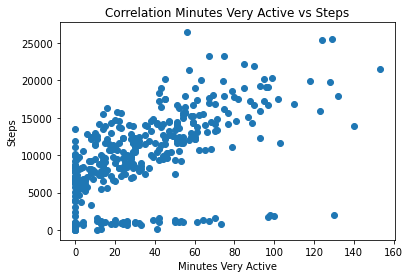

In [20]:

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Correlation Minutes Very Active vs Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [21]:
"""
your commments here
Can visualize the correlation betewen the two factores, that as ben comproved in the fuction obtain
"""

'\nyour commments here\nCan visualize the correlation betewen the two factores, that as ben comproved in the fuction obtain\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [22]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990092

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

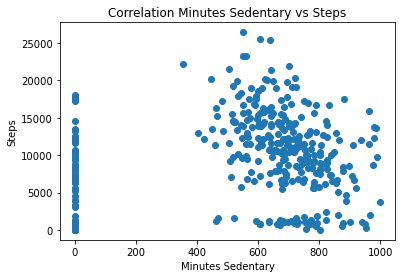

In [23]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Correlation Minutes Sedentary vs Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [24]:
"""
your commments here
Can visualize the not correlation betewen the two factores, that as ben comproved in the fuction obtain
"""

'\nyour commments here\nCan visualize the not correlation betewen the two factores, that as ben comproved in the fuction obtain\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [25]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836386

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

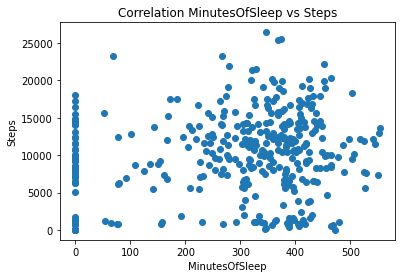

In [26]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Correlation MinutesOfSleep vs Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [27]:
"""
your commments here
Can visualize the not correlation betewen the two factores, that as ben comproved in the fuction obtain
"""

'\nyour commments here\nCan visualize the not correlation betewen the two factores, that as ben comproved in the fuction obtain\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [28]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [29]:
# your code here
fitbit_col = fitbit[columns]

cor_fit = fitbit_col.corr()

cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [30]:
# your code here

sorted = cor_fit.sort_values('Steps', ascending=False)

sorted

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


In [31]:
#The most correlated whit steps is minutes very active.

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [32]:
# your code here
time_grades = pd.read_csv(r'/Users/edgartome_1/IronHack/IronLabs/Module2/Lab5/Time_Grades.csv')

time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Grade', ylabel='Density'>

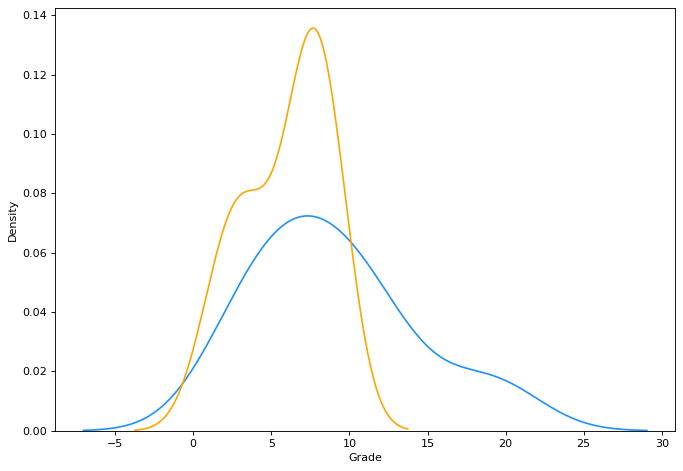

In [33]:
# your code here

plt.figure(figsize=(10,7), dpi= 80)

sns.distplot(time_grades['Study time'], hist= False, color="dodgerblue", label="Study time")

sns.distplot(time_grades['Grade'], hist= False, color="orange", label="Grade")

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [34]:
# your code here
time_grades['Study time'].corr(time_grades['Grade'], method='pearson')

0.7980456073578857

In [35]:
# your code here
time_grades['Study time'].corr(time_grades['Grade'], method='spearman')

0.819658753036942

In [36]:
#sns.lmplot(x="Study time", y="Grade", data=time_grades);

In [37]:
"""
your commments here
The two correaltions methos are similar, with more observartions, the correaltions is bigger

"""

'\nyour commments here\nThe two correaltions methos are similar, with more observartions, the correaltions is bigger\n\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

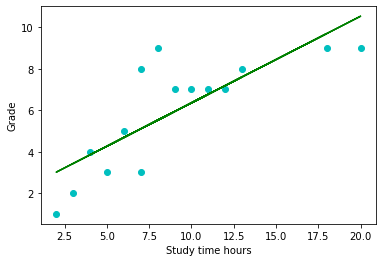

In [38]:
# your code here
plt.figure()

plt.scatter(x='Study time', y='Grade', color='c', data=time_grades)

plt.xlabel('Study time hours')

plt.ylabel('Grade')


from numpy.polynomial.polynomial import polyfit

b, m = polyfit(time_grades['Study time'], time_grades['Grade'], 1)

plt.plot(time_grades['Study time'], b + m * time_grades['Study time'], '-', color='g')

plt.show()

In [39]:
"""
your commments here
The correlations betewen result and hours of study is big
"""

'\nyour commments here\nThe correlations betewen result and hours of study is big\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [40]:
"""
your commments here
Pearson method calculates linear correaltion while Spearman correlation uses monotnic function to compare 2 
variables. The consequence of that is that Pearson correlation works with raw data while Spearman works with 
rank-ordered variables.

"""

'\nyour commments here\nPearson method calculates linear correaltion while Spearman correlation uses monotnic function to compare 2 \nvariables. The consequence of that is that Pearson correlation works with raw data while Spearman works with \nrank-ordered variables.\n\n'